In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data/Social_Network_Ads.csv')
data.drop('User ID',axis=1,inplace=True)
data.head()

for i in range(data.shape[0]):
    if(data['Gender'][i]=='Male'):
        data['Gender'][i] = 1
    else:
        data['Gender'][i] = 0

data.head()

X = data.drop('Purchased',axis=1)
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) 

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)
X2 = scaler.fit_transform(X)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
svm = SVC(probability=True)
rf = RandomForestClassifier()
adab = AdaBoostClassifier()
gdb = GradientBoostingClassifier()
xbg = XGBClassifier()

estimator_list = [('lr',lr),('dt',dt),('knn',knn),('gnb',gnb),('svm',svm)]

vt_clf_hard = VotingClassifier(estimators=estimator_list, voting='hard' )
vt_clf_soft = VotingClassifier(estimators=estimator_list, voting='soft' )

bag = BaggingClassifier(base_estimator=dt,n_estimators=100,max_samples=0.3,bootstrap=True,n_jobs=-1)
past = BaggingClassifier(base_estimator=dt,n_estimators=100,max_samples=1,bootstrap=False,n_jobs=-1)
subspace = BaggingClassifier(base_estimator=dt,n_estimators=100,max_samples=1,bootstrap=False,max_features=0.5,bootstrap_features=True,n_jobs=-1)
patch = BaggingClassifier(base_estimator=dt,n_estimators=100,max_samples=0.3,bootstrap=True,max_features=0.5,bootstrap_features=True,n_jobs=-1)

model_list = [lr,dt,knn,gnb,svm,vt_clf_hard,vt_clf_soft,bag,past,subspace,patch,rf,adab,gdb,xbg]
score_list = []
def cross_validate(model,X,y):
    cv_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')
    mean_score = np.round(np.mean(cv_score)*100,2)
    return mean_score

for model in model_list:
    scores = cross_validate(model,X2,y)
    score_list.append(scores)


C:\Users\91700\AppData\Local\Temp/ipykernel_18780/1906898690.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 1
C:\Users\91700\AppData\Local\Temp/ipykernel_18780/1906898690.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'][i] = 0
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as int

[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:24:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91700\Desktop\sample_project_1\env\lib\site-p

In [18]:
df = {'lor' : score_list[0],
      'dt' :  score_list[1],
      'knn' : score_list[2],
      'gnb' : score_list[3],
      'svm' : score_list[4], 
      'vt_hard' : score_list[5],
      'vt_soft' : score_list[6],
      'bagging' : score_list[7],
      'pasting' : score_list[8],
      'subspaces': score_list[9],
      'patches' : score_list[10],
      'rf' : score_list[11],
      'adab' : score_list[12],
      'gdb' : score_list[13],
      'xgb' : score_list[14]}

In [19]:
scores = pd.DataFrame(df,index=[0])

In [20]:
scores

,lor,dt,knn,gnb,svm,vt_hard,vt_soft,bagging,pasting,subspaces,patches,rf,adab,gdb,xgb
0,82.25,84.0,90.75,87.5,90.5,88.0,88.0,90.0,64.25,64.25,81.25,88.75,87.0,87.75,87.25


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


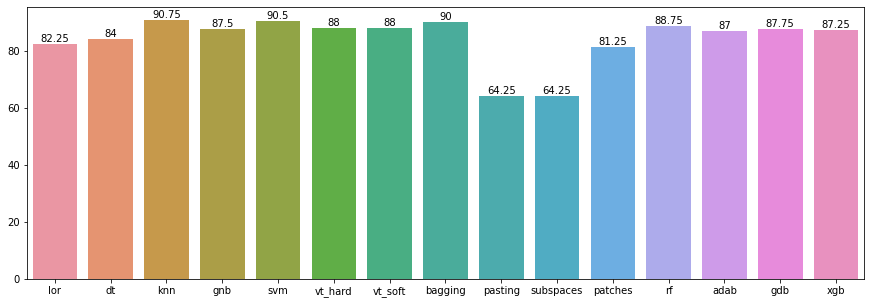

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(scores.columns,score_list)
ax.bar_label(ax.containers[0]);